S Harisankar | Date: 10-11-2022

# Program on convolutional neural network to classify images from any standard dataset in the public domain using Keras framework

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel size to 0-1

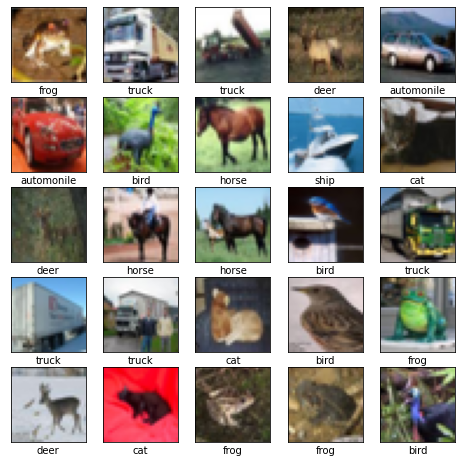

In [12]:
class_names=['airplane','automonile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.7834 - accuracy: 0.3765 - val_loss: 1.4728 - val_accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3673 - accuracy: 0.5081 - val_loss: 1.2613 - val_accuracy: 0.5576
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2000 - accuracy: 0.5740 - val_loss: 1.2096 - val_accuracy: 0.5729
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0882 - accuracy: 0.6173 - val_loss: 1.1461 - val_accuracy: 0.5979
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9990 - accuracy: 0.6508 - val_loss: 1.0765 - val_accuracy: 0.6346
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9265 - accuracy: 0.6767 - val_loss: 1.1803 - val_accuracy: 0.6127
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8624 - accuracy: 0.6989 - val_loss: 1.0420 -

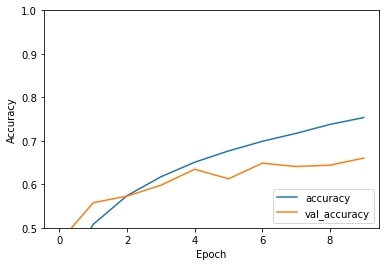

In [19]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss